1. Load Dataset

In [8]:
import seaborn as sns
import pandas as pd

# Load Titanic dataset
df = sns.load_dataset("titanic")
df.head()
df.to_csv("titanic_cleaned.csv", index=False)

2. Data Cleaning & Preprocessing

In [2]:
# Drop irrelevant or high-missing columns
df = df.drop(columns=["deck", "embark_town", "alive", "who", "adult_male", "class"])

# Drop rows with missing target
df = df.dropna(subset=["embarked", "age", "embarked"])

# Fill missing values
df["age"].fillna(df["age"].median(), inplace=True)
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)

# Encode categorical variables
df["sex"] = df["sex"].map({"male": 0, "female": 1})
df["embarked"] = df["embarked"].map({"S": 0, "C": 1, "Q": 2})
df["alone"] = df["alone"].astype(int)

# Features and target
X = df.drop(columns=["survived"])
y = df["survived"]


/var/folders/yx/_q9pdfs12pzbszwj6_cw_vdm0000gn/T/ipykernel_54406/1117572368.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].median(), inplace=True)
/var/folders/yx/_q9pdfs12pzbszwj6_cw_vdm0000gn/T/ipykernel_54406/1117572368.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

3. Train-Test Split

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


4. Train Gradient Boosting Model

In [4]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

5. Evaluate Model Performance

In [5]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = gb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7902097902097902
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.82        80
           1       0.81      0.68      0.74        63

    accuracy                           0.79       143
   macro avg       0.79      0.78      0.78       143
weighted avg       0.79      0.79      0.79       143

Confusion Matrix:
 [[70 10]
 [20 43]]


The model performs well at identifying passengers who did not survive (Class 0), with high recall (0.88).

However, it's slightly less effective at catching all survivors (Class 1), likely due to class imbalance or overlapping feature distributions.

The balance between precision and recall is acceptable but could be improved for Class 1.

6. Feature Importance

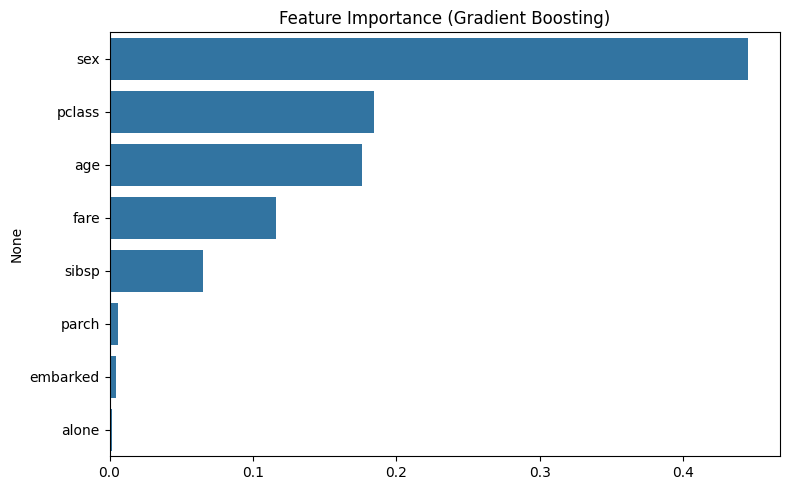

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance plot
feature_importance = pd.Series(gb.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title("Feature Importance (Gradient Boosting)")
plt.tight_layout()
plt.show()


Sex is the most critical feature, which aligns with the "women and children first" historical context of Titanic survival.

Class and Age are also highly influential — younger passengers and those in 1st class had better survival chances.

Features like parch, embarked, and alone had minimal impact, which may suggest these either:

Contain noisy or redundant information

Overlap with more important features



7. ROC Curve & AUC

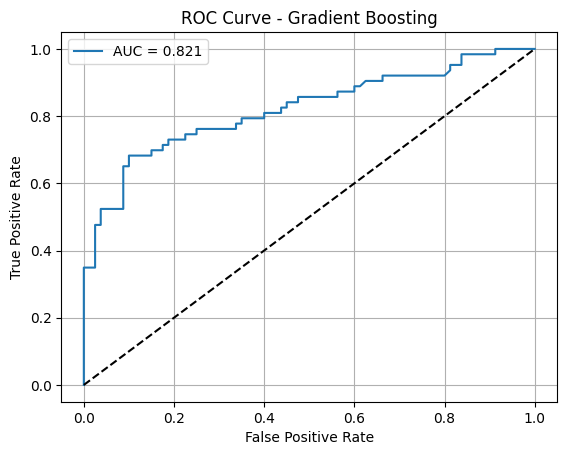

In [7]:
from sklearn.metrics import roc_auc_score, roc_curve

y_proba = gb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr, label="AUC = %.3f" % roc_auc_score(y_test, y_proba))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting")
plt.legend()
plt.grid(True)
plt.show()


An AUC of 0.82 indicates strong discriminative ability between survivors and non-survivors.

The ROC curve bows well above the diagonal baseline, showing the model is significantly better than random guessing.

The model strikes a good tradeoff between true positives and false positives.



8. Conclusion
The Gradient Boosting model performs effectively on the Titanic dataset:

Accuracy is solid at ~79%, with an AUC of 0.82, showing it separates the classes well.

The model performs best at identifying non-survivors and slightly underperforms on identifying survivors, which can be improved through:

Class rebalancing (e.g., using class_weight)

Hyperparameter tuning (learning rate, max depth)

Feature engineering (e.g., combining SibSp and Parch into family size)

Overall, Gradient Boosting demonstrates strong capability in this binary classification problem with meaningful and interpretable feature importance.